Load text files

In [2]:
def loadFile(name):
    with open(name, 'r', encoding='iso-8859-2') as f:
        return [x.rstrip('\n') for x in f.readlines()]

textcz = loadFile('TEXTCZ1.txt')
texten = loadFile('TEXTEN1.txt')

Generate n-grams and compute frequencies

In [3]:
def generateNgrams(tokens, n):
    # It's ok to use tuples, since they are hashable
    ngrams = zip(*[tokens[i:] for i in range(n)])
    return ngrams

import collections
def frequency(ngram):
    return collections.Counter(ngram)

def distribution(ngram):
    freq = frequency(ngram)
    total = float(sum(freq.values()))
    return {k:v/total for (k,v) in freq.items()}

Compute entropy

In [4]:
import math
def cond_entropy(tokens):
    gram1 = list(generateNgrams(tokens, 1))
    gram2 = list(generateNgrams(tokens, 2))
    dist1 = distribution(gram1)
    dist2 = distribution(gram2)
    total = 0.0
    for (i,j) in set(gram2):
        if dist1[(i,)] != 0 and dist2[(i,j)] != 0:
            p = dist2[(i,j)]/dist1[(i,)]
            total -= dist2[(i,j)] * math.log(p, 2)
    return total

In [24]:
import random
from IPython.display import display
import pandas as pd

def messChar(tokens, prob=0.0):
    alphabet = list(set([''.join(tokens)]))[0]
    tokens = list(tokens)
    for i in range(len(tokens)):
        for j in range(len(tokens[i])):
            if random.random() < prob:
                # the character can be replaced by itself
                new = list(tokens[i])
                new = random.choice(alphabet)
                tokens[i] = new
    return tokens

def messWord(tokens, prob=0.0):
    alphabet = tokens
    tokens = list(tokens)
    for i in range(len(tokens)):
        if random.random() < prob:
            # the word can be replaced by itself
            tokens[i] = random.choice(alphabet)
    return tokens

PROBS = [0, 0.00001, 0.0001, 0.001, 0.01, 0.05, 0.1]
def experiment1(tokens, messFun, repeat=1):
    out = []
    for probI in range(len(PROBS)):
        random.seed(0)
        entropies = []
        for i in range(repeat):
            tokensModified = messFun(tokens, PROBS[probI])
            entropies.append(cond_entropy(tokensModified))
        out.append((probI, PROBS[probI], sum(entropies)/len(entropies), min(entropies), max(entropies)))
    return pd.DataFrame(data=out, columns=['index', 'prob', 'avg', 'min', 'max'])

expCzChar = experiment1(textcz, messChar)
expCzWord = experiment1(textcz, messWord)
expEnChar = experiment1(texten, messChar)
expEnWord = experiment1(texten, messWord)

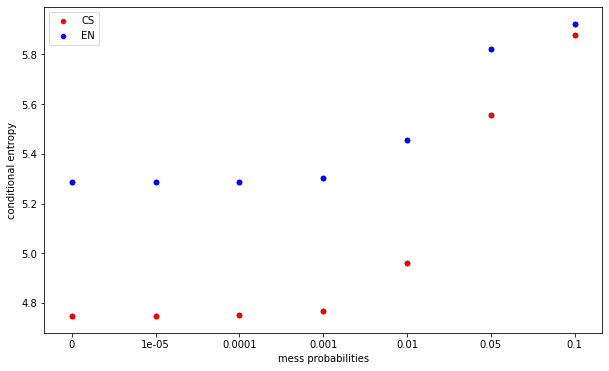

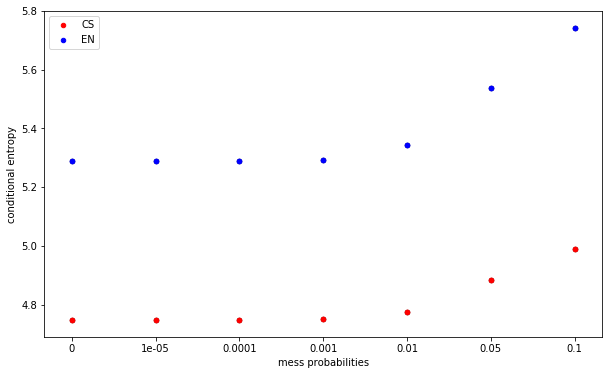

In [27]:
import matplotlib.pyplot as plt

def plotEx1(exps, cols, labels):
    ax = plt.gca()
    ax.set_xticklabels([''] + PROBS)
    for (exp,col,lab) in zip(exps, cols, labels):
        exp.plot(kind='scatter', color='Dark'+col, y='min', x='index', ax=ax, figsize=(10,6))
        exp.plot(kind='scatter', color='Dark'+col, y='max', x='index', ax=ax)
        exp.plot(kind='scatter', color=col, y='avg', x='index', ax=ax, label=lab)
    plt.xlabel('mess probabilities')
    plt.ylabel('conditional entropy')
    plt.show()

plotEx1([expCzChar, expEnChar], ['Red', 'Blue'], ['CS', 'EN'])
plotEx1([expCzWord, expEnWord], ['Red', 'Blue'], ['CS', 'EN'])

'ASDF'

,prob,avg,min,max
0,0.00000,4.747841,4.747841,4.747841
1,0.10000,5.879605,5.877549,5.881661
2,0.05000,5.559603,5.557623,5.561582
3,0.01000,4.960341,4.960262,4.960421
4,0.00100,4.767850,4.767743,4.767958
5,0.00010,4.749825,4.749794,4.749856
6,0.00001,4.748037,4.748004,4.748069
